In [9]:
"""bind all piece of numpy to one"""

'bind all piece of numpy to one'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import os

In [11]:
def crawl_folder(folder_path): #search_str 찾고자 하는 string 

    search_path_list=[]

    fileList = os.walk(folder_path).next()[2]

    subFolder_list = os.walk(folder_path).next()[1]

    if(len(fileList)!=0):

        for j in range(len(fileList)):

            search_path_list.append(folder_path+'/'+fileList[j])

    if len(subFolder_list)==0:

        return search_path_list

    else: 
        

        for i in range(len(subFolder_list)):

            search_path_list.extend(crawl_folder(folder_path+'/'+subFolder_list[i] ))

        return search_path_list

In [12]:
def pic2numpy_TVT(list_path1 , list_path2 , train_rate , val_rate ,save_path ,img_row,img_col, \

                  color_ch,sort_type = 'random', aug=True , resize=True):

    n_class=2

    #dic type 변수를 만들어 거기에다가 path 와 

    dic_path_lab_all={}

    for ele in list_path_1:

        dic_path_lab_all[ele]=1

    for ele in list_path_2:

        dic_path_lab_all[ele]=2

    

    list_path_all=[]

    

    list_path_all.extend(list_path_1)

    list_path_all.extend(list_path_2)

    list_path_all=random.sample(list_path_all , len(list_path_all))

    

    

    n_list_path_all = len(list_path_all)

    n_train =int(train_rate*n_list_path_all) # number of train 

    n_val = int (val_rate*n_list_path_all) #number of val

    n_test= n_list_path_all-(n_train+n_val)

    print '모든 사진 갯수 ' , n_list_path_all

    print 'training  개수 : ' , n_train

    print 'validation  개수 : ',n_val

    print 'test  개수 : ',n_test

    

    train_count =0

    val_count=0

    test_count=0

    

    np_train=np.zeros([n_train , img_row , img_col , color_ch])

    np_train_lab = np.zeros([n_train , n_class])

    np_val=np.zeros([n_val , img_row , img_col , color_ch])

    np_val_lab = np.zeros([n_val , n_class])

    np_test=np.zeros([n_test , img_row , img_col , color_ch])

    np_test_lab = np.zeros([n_test , n_class])



    for ele in list_path_all:

    #define img_np 

        if ".dcm" in ele:

            img=dicom.read_file(ele)

            img_np=ds.pixel_array

        elif ".bmp" in ele: 

            img=Image.open(ele)

            if resize == True:

                img=img.resize((img_row , img_col) , Image.ANTIALIAS)

            img_np= np.array(img)

        elif ".jpg" in ele: 

            img=Image.open(ele)

            if resize == True:

                img=img.resize((img_row , img_col) , Image.ANTIALIAS)

            img_np= np.array(img)



        elif ".png" in ele:

            img=Image.open(ele)

            if resize == True:

                img=img.resize((img_row , img_col) , Image.ANTIALIAS)

            img_np= np.array(img)



        if len(np.shape(img_np))==2:

            img_np = np.expand_dims(img_np,2)

            

    #define lab_np 

    #img=mpimg.imread('stinkbug.png')

        if dic_path_lab_all[ele]==1:

            lab_np=0

        elif dic_path_lab_all[ele]==2:

            lab_np=1

        

        if train_count < n_train:

            np_train[train_count] =img_np

            np_train_lab[train_count , lab_np:lab_np+1] = 1

            train_count+=1



        elif val_count < n_val:

            np_val[val_count] = img_np

            np_val_lab[val_count , lab_np:lab_np+1]=1

            val_count +=1



        elif test_count < n_test:

            np_test[test_count] = img_np

            np_test_lab[test_count , lab_np:lab_np+1] = 1

            test_count +=1 

            

    np.save(save_path+'/'+'train_img',np_train)

    np.save(save_path+'/'+'train_lab',np_train_lab)

    np.save(save_path+'/'+'val_img',np_val)

    np.save(save_path+'/'+'val_lab',np_val_lab)

    np.save(save_path+'/'+'test_img',np_test)

    np.save(save_path+'/'+'test_lab',np_test_lab)

    

# Malignant  

In [13]:
mal_folder_path = '../Mal_crop'
benign_folder_path = '../Benign_crop'

mal_np_path=crawl_folder(mal_folder_path)
benign_np_path=crawl_folder(benign_folder_path)

print len(mal_np_path)
print len(benign_np_path)

img_row = 100
img_col = 100
count=0
for i,path in enumerate(mal_np_path):
    try:
        np_img=np.load(path)
    except IOError as ior:
        print str(ior)
        continue;
    count+=1
    if len(np.shape(np_img))==2 :
        np_img=np.expand_dims(np_img , axis =0)
        np_img=np.expand_dims(np_img , axis =4)
    if count ==1:
        print count
        pre_np = np_img
    else:
        np_imgs=np.concatenate((pre_np , np_img) , axis=0)
        pre_np = np_imgs 
print np.shape(np_imgs)
#define labels
np_labs=np.zeros([len(np_imgs),2])
for i in range(len(np_imgs)):
    np_labs[i,0]=1

    

1136
229
1
Failed to interpret file '../Mal_crop/Mal_crop/.git/index' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/config' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/HEAD' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/packed-refs' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/description' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/logs/HEAD' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/logs/refs/heads/master' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/logs/refs/remotes/origin/HEAD' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/objects/pack/pack-93f0db05ea7b79d3d3699c78642654a480fcf044.pack' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/objects/pack/pack-93f0db05ea7b79d3d3699c78642654a480fcf044.idx' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/info/exclude' as a pickle
Failed to interpret file '../

In [14]:
mal_folder_path = '../Mal_crop'
benign_folder_path = '../Benign_crop'

mal_np_path=crawl_folder(mal_folder_path)
benign_np_path=crawl_folder(benign_folder_path)

print len(mal_np_path)
print len(benign_np_path)

img_row = 100
img_col = 100
count=0
for i,path in enumerate(mal_np_path):
    try:
        np_img=np.load(path)
    except IOError as ior:
        print str(ior)
        continue;
    count+=1
    if len(np.shape(np_img))==2 :
        np_img=np.expand_dims(np_img , axis =0)
        np_img=np.expand_dims(np_img , axis =4)
    if count ==1:
        print count
        pre_np = np_img
    else:
        np_imgs=np.concatenate((pre_np , np_img) , axis=0)
        pre_np = np_imgs 
print np.shape(np_imgs)
#define labels
np_labs=np.zeros([len(np_imgs),2])
for i in range(len(np_imgs)):
    np_labs[i,0]=1

np.save('../Numpy_data_set/mal_imgs',np_imgs)
np.save('../Numpy_data_set/mal_lab',np_labs)    


#save Benign

count=0
for i,path in enumerate(benign_np_path):
    try:
        np_img=np.load(path)
    except IOError as ior:
        print str(ior)
        continue;
    count+=1
    if len(np.shape(np_img))==2 :
        np_img=np.expand_dims(np_img , axis =0)
        np_img=np.expand_dims(np_img , axis =4)
    if count ==1:
        print count
        pre_np = np_img
    else:
        np_imgs=np.concatenate((pre_np , np_img) , axis=0)
        pre_np = np_imgs 
print np.shape(np_imgs)
#define labels
np_labs=np.zeros([len(np_imgs),2])
for i in range(len(np_imgs)):
    np_labs[i,1]=1

np.save('../Numpy_data_set/benign_imgs',np_imgs)
np.save('../Numpy_data_set/benign_lab',np_labs)

1136
229
1
Failed to interpret file '../Mal_crop/Mal_crop/.git/index' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/config' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/HEAD' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/packed-refs' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/description' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/logs/HEAD' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/logs/refs/heads/master' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/logs/refs/remotes/origin/HEAD' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/objects/pack/pack-93f0db05ea7b79d3d3699c78642654a480fcf044.pack' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/objects/pack/pack-93f0db05ea7b79d3d3699c78642654a480fcf044.idx' as a pickle
Failed to interpret file '../Mal_crop/Mal_crop/.git/info/exclude' as a pickle
Failed to interpret file '../

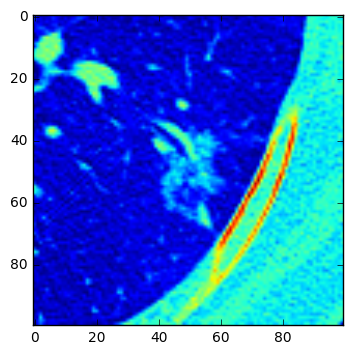

In [15]:
np_imgs = np.load('../Numpy_data_set/mal_imgs.npy')
img=np.reshape(np_imgs[0] , newshape = (100,100))
plt.imshow(img)


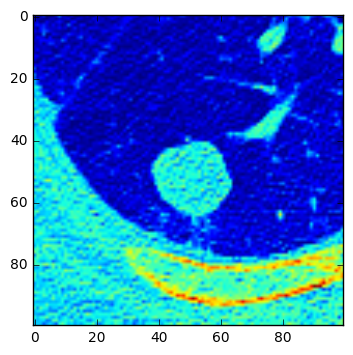

In [16]:
np_imgs = np.load('../Numpy_data_set/benign_imgs.npy')
img=np.reshape(np_imgs[3] , newshape = (100,100))
plt.imshow(img)